In [23]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams['figure.figsize'] = [15, 7]

df = pd.read_csv('Data/startup.csv')



# <font color='black'> Min-Max Normalization</font>


In [24]:
data_scaled = df[[ 'ms_press','ms_temp', 'load', 'load_sp', 'rpm', 'cv_opn', 'gen_cur']].copy()

for column in data_scaled.columns:
    data_scaled[column] = ( data_scaled[column] - data_scaled[column].min() ) / ( data_scaled[column].max() - data_scaled[column].min())

df_new = data_scaled.assign( time = df['time'])



# <font color='black'> Plotting Variables </font>

### <font color='black'> MW (S.P and O/P), Main Steam Temp and Press. </font>

<AxesSubplot:xlabel='time'>

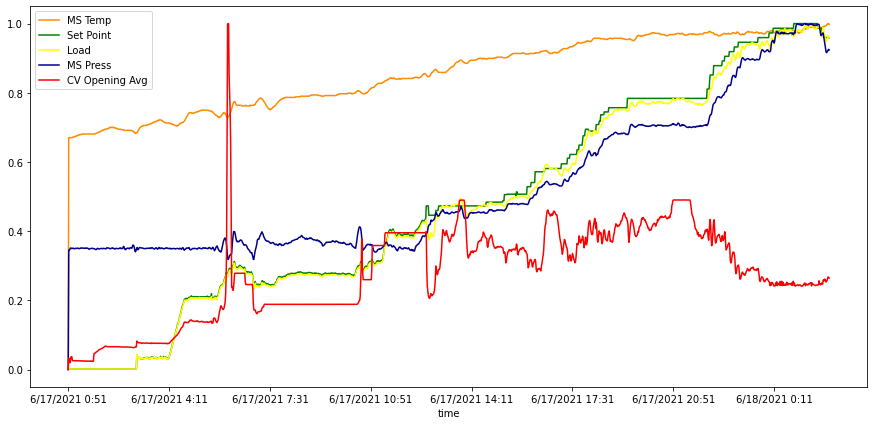

In [25]:
ax = df_new.plot('time' ,'ms_temp', label = 'MS Temp', color="DarkOrange")
df_new.plot('time', 'load_sp' , label = 'Set Point', ax =ax, color="Green")
df_new.plot('time' ,'load', label = 'Load', color="Yellow", ax= ax)
df_new.plot('time', 'ms_press' , label = 'MS Press', ax =ax, color="DarkBlue")
df_new.plot('time', 'cv_opn' , label = 'CV Opening Avg', ax =ax, color="Red")

#df_new.plot('time', 'rpm' , label = 'RPM', ax =ax, color="Yellow")

### <font color='black'> Gen Current, Gen MW, and RPM </font>


<AxesSubplot:xlabel='time'>

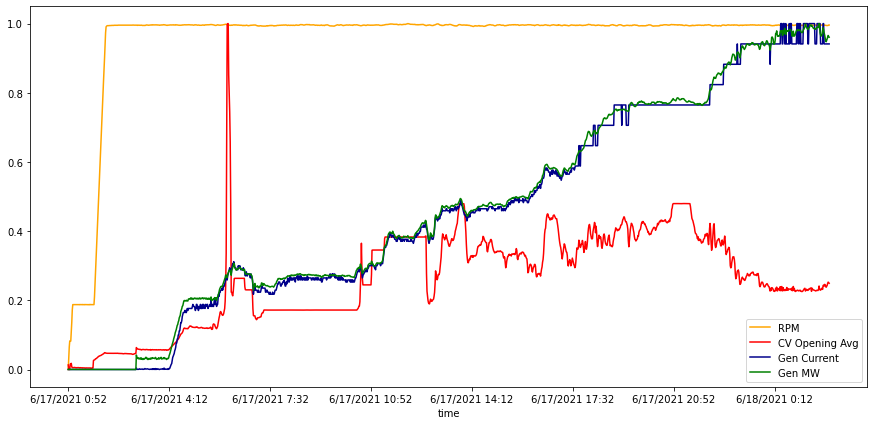

In [14]:
ax = df_new.plot('time' ,'rpm', label = 'RPM', color="Orange")
df_new.plot('time', 'gen_cur' , label = 'Gen Current', ax =ax, color="DarkBlue")
df_new.plot('time', 'load' , label = 'Gen MW', ax =ax, color="Green")

# <font color='black'> Calculating Correlation  </font>

In [9]:
print('Correlation (First Stage)')
print(df_new[137:750][['ms_temp', 'load']].corr())
print(df_new[137:750][['ms_press', 'load']].corr())

print('')

print('Correlation (Second Stage)')
print(df_new[750:][['ms_temp', 'load']].corr())
print(df_new[750:][['ms_press', 'load']].corr())


Correlation (First Stage)
          ms_temp      load
ms_temp  1.000000  0.917975
load     0.917975  1.000000
          ms_press      load
ms_press  1.000000  0.493098
load      0.493098  1.000000

Correlation (Second Stage)
         ms_temp    load
ms_temp   1.0000  0.9445
load      0.9445  1.0000
          ms_press     load
ms_press   1.00000  0.98901
load       0.98901  1.00000


In [98]:
#ax = df.plot.area('ms_press_left', 'mw', color="DarkBlue", label="ms press")
#plt.xlim([0, 300])
#df.plot.area('ms_temp', 'mw',  color="DarkGreen", label="ms temp")
#plt.xlim([0, 700])